Amirhossein Safari

97463137

CNN Mnist Confusion Assignment

----------------------------------------------

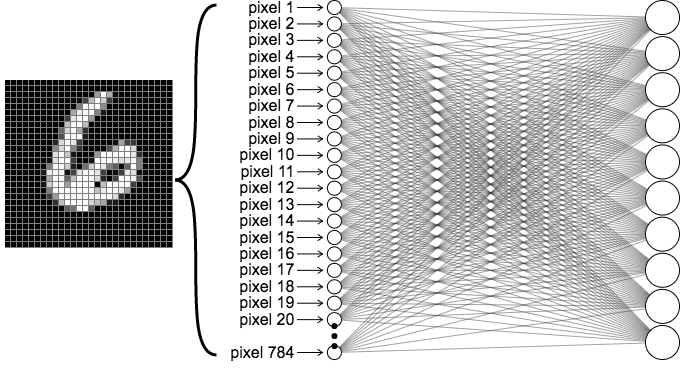

Importing Dataset

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Reshaping

In [3]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255



Showing some of the images

In [17]:
import matplotlib.pyplot as plt

In [18]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])

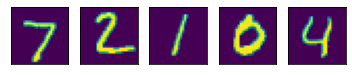

In [19]:
plot_example(test_images, test_images)

In [8]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

In [10]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

Traning the data

In [11]:
norm_history = model.fit(train_images, train_labels, epochs=5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 49s 52ms/step - loss: 0.1725 - accuracy: 0.9459
Epoch 2/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0471 - accuracy: 0.9855
Epoch 3/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0320 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0239 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 48s 51ms/step - loss: 0.0187 - accuracy: 0.9941


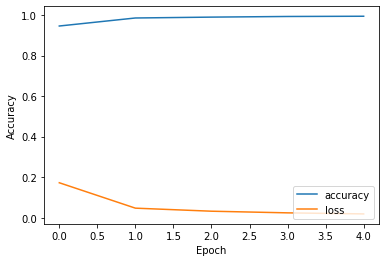

In [27]:
plt.plot(norm_history.history['accuracy'], label='accuracy')
plt.plot(norm_history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.6, 1.1])
plt.legend(loc='lower right');



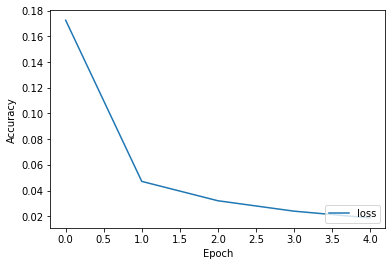

In [26]:
plt.plot(norm_history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.6, 1.1])
plt.legend(loc='lower right');

In [28]:
model.evaluate(test_images, test_labels)[1]

313/313 [==============================] - 4s 11ms/step - loss: 0.0327 - accuracy: 0.9910


0.9909999966621399

In [30]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

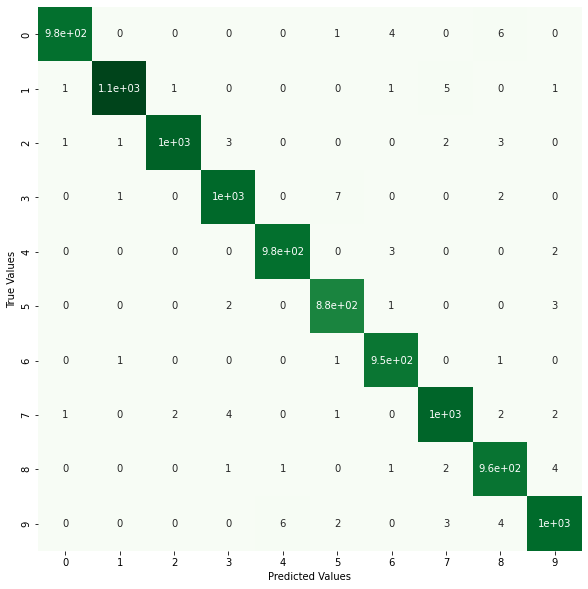

In [31]:
fig = plt.figure(figsize=(10, 10))

y_pred = model.predict(test_images) 

Y_pred = np.argmax(y_pred, 1)
Y_test = np.argmax(test_labels, 1)

mat = confusion_matrix(Y_test, Y_pred)

# Plot
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Greens)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0